### Setup

In [190]:
# Output plots within notebook

%matplotlib inline

# Import libraries needed

import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set random seed to 0

np.random.seed(0)

#### Loading data from MNIST

In [191]:
# Fetch MNIST dataset from mldata.org

mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')

# Create variables for data and labels

X, Y = mnist.data, mnist.target

#### Prep data

In [192]:
# Divide by 255 which is similar to dividing by 9 in base ten arithmetic

X = X / 255.0

# Shuffle data

shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

# Preview shape

print ('data shape: ', X.shape)
print ('label shape:', Y.shape)

data shape:  (70000, 784)
label shape: (70000,)


#### Split data into different subsets

In [193]:
# mini_train_data will be the main traning dataset

test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

### Part 1

Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

In [194]:
# Find 10 examples of each digit

smp_0 = [mini_train_data[i] for i in np.where(mini_train_labels==0)[0]][:10]
smp_1 = [mini_train_data[i] for i in np.where(mini_train_labels==1)[0]][:10]
smp_2 = [mini_train_data[i] for i in np.where(mini_train_labels==2)[0]][:10]
smp_3 = [mini_train_data[i] for i in np.where(mini_train_labels==3)[0]][:10]
smp_4 = [mini_train_data[i] for i in np.where(mini_train_labels==4)[0]][:10]
smp_5 = [mini_train_data[i] for i in np.where(mini_train_labels==5)[0]][:10]
smp_6 = [mini_train_data[i] for i in np.where(mini_train_labels==6)[0]][:10]
smp_7 = [mini_train_data[i] for i in np.where(mini_train_labels==7)[0]][:10]
smp_8 = [mini_train_data[i] for i in np.where(mini_train_labels==8)[0]][:10]
smp_9 = [mini_train_data[i] for i in np.where(mini_train_labels==9)[0]][:10]

# Create master list of 100 examples

digits = smp_0 + smp_1 + smp_2 + smp_3 + smp_4 + smp_5 + smp_6 + smp_7 + smp_8 + smp_9

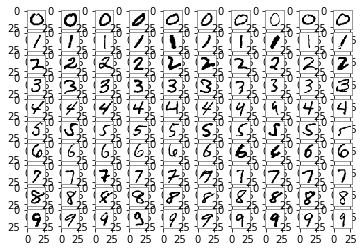

In [195]:
# Plot the 100 examples

fig,axes = plt.subplots(10,10)
for i,ax in enumerate(axes.flat):
    digit = digits[i]
    digit = digit.reshape((28,28))
    ax.imshow(digit, cmap=plt.cm.gray_r)

plt.show()

### Part 2

Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [198]:
# Measure accuracy for different k values. Accuracy defined as number of misclassified labels.

for k in [1,3,5,7,9]:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(mini_train_data, mini_train_labels)
    predict_dev_labels = model.predict(dev_data)
    
    print("For k=%d, the number of lables misclassified was"  % k ,sum(dev_labels != predict_dev_labels))

For k=1, the number of lables misclassified was 112
For k=3, the number of lables misclassified was 122
For k=5, the number of lables misclassified was 131
For k=7, the number of lables misclassified was 135
For k=9, the number of lables misclassified was 137


In [199]:
# Produce classifcation report for k = 1

model = KNeighborsClassifier(n_neighbors=1)
model.fit(mini_train_data, mini_train_labels)
predict_dev_labels = model.predict(dev_data)

print(classification_report(dev_labels, predict_dev_labels))

             precision    recall  f1-score   support

        0.0       0.91      0.98      0.94        99
        1.0       0.89      1.00      0.94       105
        2.0       0.99      0.79      0.88       102
        3.0       0.77      0.87      0.82        86
        4.0       0.89      0.82      0.85       104
        5.0       0.93      0.84      0.88        91
        6.0       0.94      0.96      0.95        98
        7.0       0.89      0.92      0.90       113
        8.0       0.94      0.88      0.91        96
        9.0       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000



#### Which is the most difficult digit?

The digit "9" has the worst f1 score at 0.80. 

### Part 3

Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [200]:
# Test different training set sizes with train_data dataset 

for n in [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]:
    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(train_data[:n], train_labels[:n])
    start = time.time()
    predict_dev_labels = model.predict(dev_data)
    end = time.time()
    
    print("For %d, no. of lables wrong was" % n ,sum(dev_labels != predict_dev_labels), "and prediction time was", end - start)

For 100, no. of lables wrong was 280 and prediction time was 0.14423084259033203
For 200, no. of lables wrong was 214 and prediction time was 0.28017091751098633
For 400, no. of lables wrong was 159 and prediction time was 0.5619058609008789
For 800, no. of lables wrong was 116 and prediction time was 1.152674913406372
For 1600, no. of lables wrong was 98 and prediction time was 2.830632209777832
For 3200, no. of lables wrong was 74 and prediction time was 6.127636909484863
For 6400, no. of lables wrong was 63 and prediction time was 10.279376745223999
For 12800, no. of lables wrong was 41 and prediction time was 20.084560871124268
For 25000, no. of lables wrong was 30 and prediction time was 40.562313079833984


### Part 4

Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

<function matplotlib.pyplot.show>

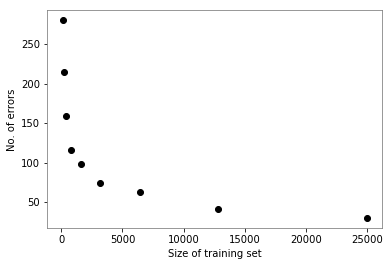

In [201]:
# Get number of misclassified for given training sizes

training_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
errors = []

for n in [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]:
    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(train_data[:n], train_labels[:n])
    predict_dev_labels = model.predict(dev_data)
    errors.append(sum(dev_labels != predict_dev_labels))

# Plot data for visual guide

plt.scatter(training_sizes,errors,color='black')
plt.xlabel("Size of training set")
plt.ylabel("No. of errors")

plt.show

In [202]:
# Fit data to regression model and predict

size=[[100],[200],[400],[800],[1600],[3200],[6400],[12800],[25000]]
errors= [280, 214, 159, 116,  98,  74,  63,  41,  30]

model=LinearRegression()
model.fit(size,errors)

print ("Coefficient is", model.coef_)
print ("Intercept is", model.intercept_)
print ("Prediction for n=60000 is", model.predict(60000))

Coefficient is [-0.00666527]
Intercept is 156.844022774
Prediction for n=60000 is [-243.07226036]


#### What does it predict for n=60000? 

It predicts -243.07226036 errors.

#### What's wrong with using regression here?

Linear regression doesn't respect the bounds of 0 so it's giving an impossible negative value.

#### Can you apply a transformation that makes the predictions more reasonable?

You could do a log transformation to compact the range of data or apply polyfit regression.

### Part 5

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

In [203]:
# Fit 1NN on dev labels

model = KNeighborsClassifier(n_neighbors=1)
model.fit(mini_train_data, mini_train_labels)
predict_dev_labels = model.predict(dev_data)

[[ 97   0   0   0   0   0   2   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  4   4  81   4   0   0   0   4   3   2]
 [  1   0   0  75   0   3   0   3   1   3]
 [  0   2   0   0  85   0   3   0   0  14]
 [  2   0   0   9   0  76   0   1   1   2]
 [  1   1   1   0   1   0  94   0   0   0]
 [  1   4   0   1   1   0   0 104   0   2]
 [  0   2   0   5   0   2   1   0  84   2]
 [  1   0   0   3   9   1   0   5   0  87]]


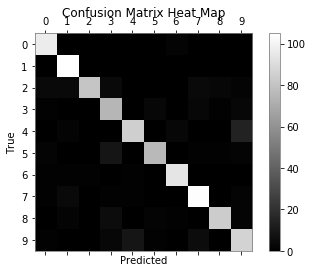

In [204]:
# Produce simple confusion matrix

cm = confusion_matrix(dev_labels, predict_dev_labels)
print(cm)


# Produce confusion matrix heatmap for extra clarity

labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion Matrix Heat Map')
fig.colorbar(cax)
plt.xticks(np.arange(min(labels), max(labels)+1, 1.0))
plt.yticks(np.arange(min(labels), max(labels)+1, 1.0))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### The most confused digit is '3' as it had the lowest diagonal value. Here are some example mistakes:

In [205]:
# Find dev_data elements where we predicted 3 but got it wrong

bad_threes = dev_data[(np.where((predict_dev_labels == 3) & (predict_dev_labels != dev_labels)))][:10]

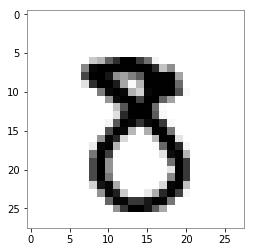

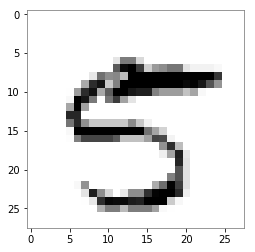

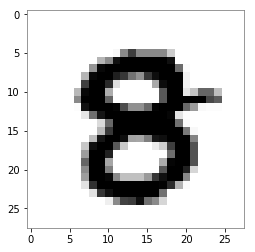

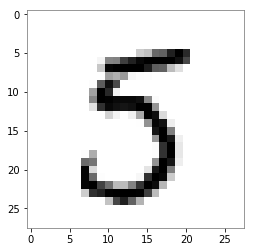

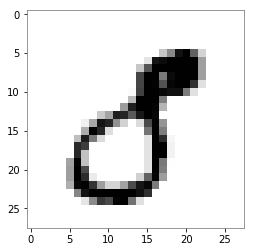

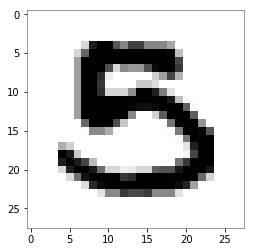

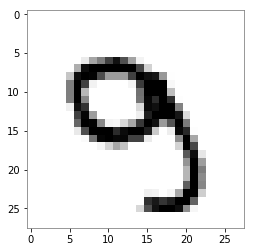

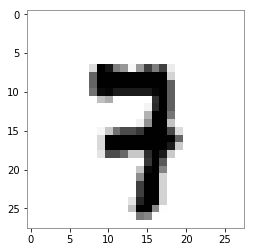

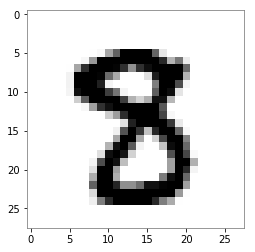

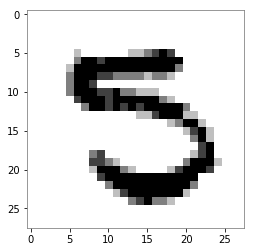

In [206]:
# Show 10 examples of bad threes

for i in bad_threes:
    i = i.reshape((28,28))
    plt.imshow(i, cmap=plt.cm.gray_r)
    plt.show()

#### Culprit seems to 8 and 5's that look like 3s.

### Part 6

A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

In [207]:
# Import specific gaussian_filter from scipy

from scipy.ndimage.filters import gaussian_filter

# Preprocess the training data but not dev_data

prepro_trainingdata = gaussian_filter(mini_train_data, sigma=0.5)
model = KNeighborsClassifier(n_neighbors=1)
model.fit(prepro_trainingdata, mini_train_labels)
predict_dev_labels = model.predict(dev_data)

print("For preprocessed traning data, the number of wrong labels was" ,sum(dev_labels != predict_dev_labels))

For preprocessed traning data, the number of wrong labels was 119


In [208]:
# Preprocess dev_data but not the training data

prepro_dev_data = gaussian_filter(dev_data, sigma=0.5)
model = KNeighborsClassifier(n_neighbors=1)
model.fit(mini_train_data, mini_train_labels)
predict_dev_labels = model.predict(prepro_dev_data)

print("For preprocessed dev data, the number of wrong labels was" ,sum(dev_labels != predict_dev_labels))

For preprocessed dev data, the number of wrong labels was 127


In [209]:
# Preprocess both training and dev data

model = KNeighborsClassifier(n_neighbors=1)
model.fit(prepro_trainingdata, mini_train_labels)
predict_dev_labels = model.predict(prepro_dev_data)

print("For preprocess for both, the number of wrong labels was" ,sum(dev_labels != predict_dev_labels))

For preprocess for both, the number of wrong labels was 131


Blurred


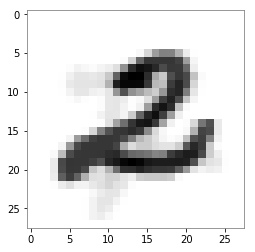

Not blurred


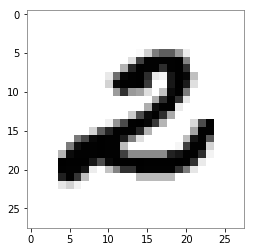

In [210]:
# Example of blur digit v.s. not-blurred

print ("Blurred")
i = prepro_trainingdata[3]
i = i.reshape((28,28))
plt.imshow(i, cmap=plt.cm.gray_r)
plt.show()

print ("Not blurred")

i = mini_train_data[3]
i = i.reshape((28,28))
plt.imshow(i, cmap=plt.cm.gray_r)
plt.show()

### Part 7

Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [211]:
# Binarize the mini_train_data set 

from sklearn.preprocessing import binarize

binarize_mini = binarize(mini_train_data)

# Create BernoililNB model

model = BernoulliNB()
model.fit(binarize_mini, mini_train_labels)
predict_dev_labels = model.predict(dev_data)

print("For BernoililNB, the number of wrong labels was" ,sum(dev_labels != predict_dev_labels))

For BernoililNB, the number of wrong labels was 185


In [212]:
# Transform data into 0s, 1s, and 2s

copy_mini = np.array(mini_train_data)

for arr in copy_mini:
    
    arr[np.where(arr <= 0.33)] = 0
    arr[np.where((arr > 0.33) & (arr < 0.66))] = 1
    arr[np.where((arr > 0.66) & (arr < 1))] = 2

In [213]:
# Apply MultinomialNB and test

model = MultinomialNB()
model.fit(copy_mini, mini_train_labels)
predict_dev_labels = model.predict(dev_data)

print("For MultinomialNB, the number of wrong labels was" ,sum(dev_labels != predict_dev_labels))

For MultinomialNB, the number of wrong labels was 205


#### Does the multi-class version improve the results? Why or why not?

It did not improve as errors went up from 185 to 205. 

Looking at the comparison below, we see that binarizing data leads to more definite shapes with less chance for breaks. 

Three colors creates more ambuiguity which could lead to a break up of crucial patterns. 

Black and White


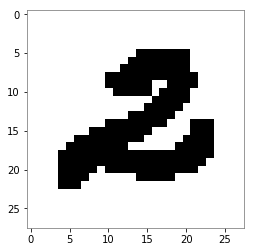

White, Grey, and White


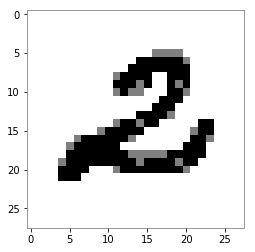

In [214]:
print ("Black and White")
i = binarize_mini[3]
i = i.reshape((28,28))
plt.imshow(i, cmap=plt.cm.gray_r)
plt.show()

print ("White, Grey, and White")

i = copy_mini[3]
i = i.reshape((28,28))
plt.imshow(i, cmap=plt.cm.gray_r)
plt.show()

### Part 8 

Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [215]:
# Prepare a range of alpha values to test

alphas = np.array([0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0])

# Create and fit model, testing each alpha

model = BernoulliNB()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(mini_train_data, mini_train_labels)

# Summarize the results and highlight the best score

print("Summary of results")

results = grid.grid_scores_

for i in results:
    print(i)

print("The best score was", grid.best_score_)

/Users/alexanderchung/anaconda/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/alexanderchung/anaconda/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/alexanderchung/anaconda/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Summary of results
mean: 0.80300, std: 0.03072, params: {'alpha': 0.0}
mean: 0.82000, std: 0.02208, params: {'alpha': 0.0001}
mean: 0.82000, std: 0.02305, params: {'alpha': 0.001}
mean: 0.82000, std: 0.02607, params: {'alpha': 0.01}
mean: 0.82100, std: 0.02454, params: {'alpha': 0.10000000000000001}
mean: 0.81900, std: 0.02147, params: {'alpha': 0.5}
mean: 0.81200, std: 0.01814, params: {'alpha': 1.0}
mean: 0.81000, std: 0.01767, params: {'alpha': 2.0}
mean: 0.77500, std: 0.01719, params: {'alpha': 10.0}
The best score was 0.821


#### What is the best value for alpha? 

The best score was 0.821 which was for alpha of 0.10000000000000001. 

#### What is the accuracy when alpha=0? Is this what you'd expect?

The mean score of alpha=0 is 0.80300. I would have expected an error given we are running a probability on 0. 

It must have defaulted to some non-zero number. 

### Part 9 

Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [216]:
# Train Guassian model

model = GaussianNB()
model.fit(mini_train_data, mini_train_labels)
predict_dev_labels = model.predict(dev_data)

print("For GaussianNB, the number of wrong labels was" ,sum(dev_labels != predict_dev_labels))

# Print classification report

print (classification_report(dev_labels, predict_dev_labels))

For GaussianNB, the number of wrong labels was 379
             precision    recall  f1-score   support

        0.0       0.75      0.84      0.79        99
        1.0       0.82      0.89      0.85       105
        2.0       0.62      0.39      0.48       102
        3.0       0.62      0.45      0.52        86
        4.0       0.80      0.39      0.53       104
        5.0       0.52      0.36      0.43        91
        6.0       0.69      0.88      0.77        98
        7.0       0.84      0.48      0.61       113
        8.0       0.41      0.61      0.49        96
        9.0       0.47      0.88      0.61       106

avg / total       0.66      0.62      0.61      1000



Was unable to find simple fix to improve accuracy. I assume it involves a transformation to sigma make the data appear more like a normal distribution. 

### Part 10

Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

In [217]:
# Train model 

model = BernoulliNB(binarize=0.5)
model.fit(mini_train_data, mini_train_labels)

BernoulliNB(alpha=1.0, binarize=0.5, class_prior=None, fit_prior=True)

In [218]:
# Define labels

labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

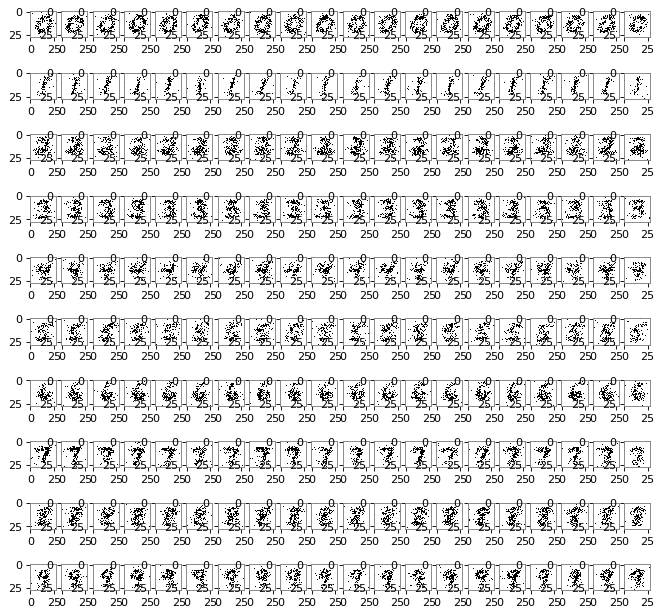

In [226]:
# Generate random numbers then estimate probability of each pixel

plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')

for i in labels:
    for p in range(20):
        # Produce random dummy digit
        img = np.random.rand(784)
        # Convert into pixel if value is greater than probability
        for idx, pix in enumerate(img):
            img[idx] = int(pix > np.exp(model.feature_log_prob_[i][idx]))
        # Produce plot    
        ax = plt.subplot(len(model.feature_log_prob_), 20, i*20 + p + 1)
        plt.imshow(img.reshape((28,28)))

plt.show()

#### How do the generated digits compare to the training digits?

Generated digits are very lossy but assume the general pattern of training digits.

### Part 11

Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [227]:
# Define buckets, correct and total

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

# Create BernoulliNB with reasonable alpha & predict labels and probabilities

model = BernoulliNB(binarize = 0.5, alpha = 0.01)
model.fit(mini_train_data, mini_train_labels)
predict_labels = model.predict(dev_data)
predict_probs = model.predict_proba(dev_data)

In [228]:
# Create list of max probabilities

max_prob = [max(i) for i in predict_probs]

# For each max probability, see what bucket it is in and check if it was correct

for i,val in enumerate(max_prob):
    for j,bval in enumerate(buckets):
        if val <= bval:
            total[j] +=1
        elif predict_labels[i] == dev_labels[i]:
            total[j] +=1
            correct[j] +=1
            
accuracy = [correct[i]/total[i] for i,val in enumerate(buckets)]            

# Display data 

import pandas as pd 

df = pd.DataFrame({'Buckets': buckets, 'Totals': total, 'Correct': correct, 'Accuracy': accuracy})

print (df)

   Accuracy  Buckets  Correct  Totals
0  1.000000  0.50000      818     818
1  0.964371  0.90000      812     842
2  0.869369  0.99900      772     888
3  0.781759  0.99999      720     921
4  0.724175  1.00000      680     939
5  0.664570  1.00000      634     954
6  0.591900  1.00000      570     963
7  0.520000  1.00000      507     975
8  0.000000  1.00000        0    1000


### How would you characterize the calibration for the Naive Bayes model?

I think I built my for loop a little wrong as I assume the totals would add up to 1000. 

However, I'm hoping it's a consistent error and that means the accuracy percentage may still be right. 

If so, it seems that accuracy dramatically falls once the maximum posterior goes above 0.9 as seen in chart below.

<function matplotlib.pyplot.show>

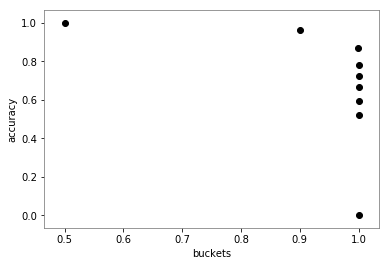

In [229]:
# Plot data for visual guide

plt.scatter(buckets,accuracy,color='black')
plt.xlabel("buckets")
plt.ylabel("accuracy")

plt.show